In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k, pi

In [2]:
from ipywidgets import interact, interactive, fixed

In [3]:
# Autor : Jhonathan Blanco 2211497

# *La ley de Planck de la radiacion del cuerpo negro*

 *Esta ley establece que la radiación del cuerpo negro tiene un espectro de frecuencia continuo y característico que depende solo de la temperatura del cuerpo, llamado espectro de Planck o ley de Planck. El espectro alcanza su punto máximo a una frecuencia característica que se desplaza a frecuencias más altas a medida que aumenta la temperatura y, a temperatura ambiente, la mayor parte de la emisión se encuentra en la región infrarroja del espectro electromagnético, la ecuacion que describe este espectro es:*
 

# $I(λ, T) = \frac{2πc^2h}{λ^5}\frac{1}{e^\frac{hc}{λkT} - 1}$

 En donde: I(λ, T) es la luminosidad espectral (la potencia por unidad de ángulo sólido y por unidad de área normal a la propagación). h es la constante de Planck; c es la velocidad de la luz en el vacío; k es la constante de Boltzmann; T es la temperatura absoluta del cuerpo.


In [4]:
#Ley de Plank
def planck(longitud, temperatura):
    I = (2 * pi * (c**2) * h) / (longitud**5 * (np.exp((h * c) / (longitud * k * temperatura)) - 1))
    return  I

In [5]:
#Gráfica de arcoiris
def luz_visible():
  ax = plt.gca()
  steps = 100
  visible = np.linspace(380e-9, 760e-9, steps)
  colormap = plt.cm.gist_rainbow
  colors = [colormap(i) for i in np.linspace(0.0, 1.0, steps)]
  j = 0

  for val in visible:
    ax.axvline(val * 1e9, lw=3,
    color=colors[-j], alpha=0.3, zorder=-1)
    j += 1

In [6]:
def rect(x,y,w,h,c):
    ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    ax.add_patch(polygon)

#Rellenado de arcoiris
def rainbow_fill(X,Y, cmap=plt.get_cmap("jet")):
    plt.plot(X,Y,lw=0)  # Plot so the axes scale correctly

    dx = X[1]-X[0]
    N  = float(X.size)
    X1 = np.array

    for n, (x,y) in enumerate(zip(X,Y)):
      if x > 380 and x < 780:
        color = cmap(n/N)
        rect(x,0,dx,y,color)

def luz_visible_under():
  visible = np.linspace(380e-9, 760e-9, 100)
  results_vis = []
  for temperature in temperature_array:
    results_vis.append(planck(visible, temperature))

  rainbow_fill(visible * 1e09, results_vis[-1])

In [7]:
#Asignación de Lamdas y temperaturas.
lambda_array = np.linspace(1.0e-9, 2.0e-6, 1000) 
temperature_array = np.arange(3000, 6001, 1000)

# Gráfico interactivo

In [8]:
#Función para hacer gráfica interactiva, en funcion de la temperatura.
def planck_interactive(wavelength_array, temperature=0):

  luz_visible()
  results = planck(wavelength_array, temperature)
  ax = plt.gca()

  ax.grid(linestyle=':', linewidth=1.5)

  ax.plot(wavelength_array * 1e9, results, "k", label='{} K'.format(temperature), linewidth=3)
  ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

  #Escala de la gráfica
  ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
  ax.yaxis.major.formatter._useMathText = True
  ax.figure.canvas.draw()  # Update the text
  order_magnitude = ax.yaxis.get_offset_text().get_text().replace('\\times',
                                                                      '')

  ax.yaxis.offsetText.set_visible(False)

  #LABELS
  plt.xlabel("Longitud de onda nm")
  ax.xaxis.label.set_size("15")

  plt.ylabel("Intensidad ("+ order_magnitude +") $w/m^3$")
  ax.yaxis.label.set_size("15")

  #Title
  ax.set_title('Ley de Planck - Radiación de cuerpo negro', fontsize=20)

  equ = "$I(λ, T) = \\frac{2πc^2h}{λ^5}\\frac{1}{e^\\frac{hc}{λkT} - 1}$"
  imax = np.where(results == max(results))
  redondito = round(float(lambda_array[imax] * 1e09), 1)
  ax.text(lambda_array[-1] *1.1 * 1e09, 0, "pico máximo ={}".format(redondito), size = 13)

#Gráfico interactivo
graph = interactive(planck_interactive,
                    wavelength_array=fixed(lambda_array),
                    temperature=(500,10000,500))
display(graph)

interactive(children=(IntSlider(value=500, description='temperature', max=10000, min=500, step=500), Output())…

# Grafico fijo

<ipython-input-4-a7d25f533500>:3: RuntimeWarning: overflow encountered in exp
  I = (2 * pi * (c**2) * h) / (longitud**5 * (np.exp((h * c) / (longitud * k * temperatura)) - 1))


Text(1000.0, 76964043271156.78, '$I(λ, T) = \\frac{2πc^2h}{λ^5}\\frac{1}{e^\\frac{hc}{λkT} - 1}$')

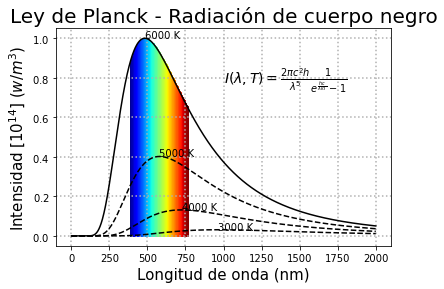

In [9]:
#luz_visible()
luz_visible_under()

results = []
for temperature in temperature_array:
  results.append(planck(lambda_array, temperature))

ax = plt.gca()

ax.grid(linestyle=':', linewidth=1.5)

#Valor de T sobre las lineas
if len(temperature_array) < 5:
  
  for i in range(len(temperature_array)):
    maxi = np.where(results[i] == max(results[i]))
    ax.text(lambda_array[maxi] * 1e09, max(results[i]) * 1, '{} K'.format(temperature_array[i]) )

  lineco = "k--"
  for result, temperature in zip(results, temperature_array):
    if temperature == temperature_array[-1]:
        lineco = "k"
    ax.plot(lambda_array * 1e9, result, lineco, label='{} K'.format(temperature), linewidth=1.5,)
    
#Legendas a un lados si hay más de 5 temperaturas
else:
  colormap = plt.cm.inferno_r
  ax.set_prop_cycle(plt.cycler('color', colormap(
  np.linspace(0, 1, len(temperature_array)))))
  
  for result, temperature in zip(results, temperature_array):
    ax.plot(lambda_array * 1e9, result, label='{} K'.format(temperature), linewidth=3)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)
  

#Escala de la gráfica
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.major.formatter._useMathText = True
ax.figure.canvas.draw()  # Update the text
order_magnitude = ax.yaxis.get_offset_text().get_text().replace('\\times',
                                                                    '')

ax.yaxis.offsetText.set_visible(False)

#Legendas
plt.xlabel("Longitud de onda (nm)")
ax.xaxis.label.set_size("15")

plt.ylabel("Intensidad ["+ order_magnitude +"] $(w/m^3)$")
ax.yaxis.label.set_size("15")

#Título
ax.set_title('Ley de Planck - Radiación de cuerpo negro', fontsize=20)

equ = "$I(λ, T) = \\frac{2πc^2h}{λ^5}\\frac{1}{e^\\frac{hc}{λkT} - 1}$"
ax.text(max(lambda_array) * 1e09 / 2, max(results[-1]) / 1.3, equ, size= 14)

